## Модель страхования Крамера-Лундберга
Рассмотрим модель страхования Крамера-Лундберга. Пусть у нас есть некоторая страховая компания с начальным капиталом (в момент времени t = 0) $y_0$. Выплаты в страховую компанию поступают равномерно со скоростью $c$ единиц денег в единицу времени. Количество несчастных случаев является Пуассоновским процессом интенсивности $\lambda$, а размер страховых выплат распределён ранвомерно на отрезке $[a, b]$. Другими словами, задан процесс
$$Y_t = y_0 + ct + \sum_{j = 0}^{N_t} \xi_j$$, где $Y_t$ отвечает за капитал в момент времени $t$, $\xi_i \sim U[a, b]$ независимы друг с другом а также независимы от пуассоновского процесса $N$.

Определим $\tau = inf \{ t : Y_t < 0 \}$ -- момент разорения.

Из курса случайных процессов известна следующая теорема:

Пусть 
$$\psi(v) = Ee^{v\xi_1}$$
$$g(v) = \lambda(\psi(v) - 1) - cv$$
Пусть также верно следующее (здесь $\xi \sim \xi_i$):
$$E\xi^2 \geq 0$$
$$\forall v > 0: \psi(v) < \infty$$
$$c - \lambda E\xi > 0$$

Тогда $P(\tau < \infty) \leq e^{-y_0 v_0}$, где $v_0$ -- единственный корень на $(0, +\infty)$ уравненния $g(v) = 0$.

Далее будем применять эту теорему.

### Средний случай
Чтобы банкротство не происходило в среднем, нужно, чтобы $EY_t > 0$. В нашем случае:
$$E(\sum_{j = 1}^{N_t} \xi_j | N_t = a) = E(\sum_{j = 1}^{a} \xi_j | N_t = a) = a E(\xi_1|N_t = a) = aE(\xi_1) = 150 a$$

$$E(\sum_{j = 1}^{N_t} \xi_j | N_t) = 150 N_t$$

$$E(\sum_{j = 1}^{N_t} \xi_j) = E(E(\sum_{j = 1}^{N_t} \xi_j | N_t)) = 150 \lambda t$$.

Итак, $EY_t = y_0 + ct - 150 \lambda t$. Тогда понятно, что необходимое и достаточное условие того, что $\forall t: EY_t >= 0$ -- это $c >= 150 \lambda$. Заметим, что это одно из условий теоремы об оценке вероятности разорения.

### 1, 5, 10-перцентили разорения
Из теоремы о разорении, если мы хотим, допустим, $P(\tau < infty) \leq 1\% = 0.01$, то нам надо, чтобы $e^{-y_0v_0} \leq 0.01$. В нашем случае $\psi(v)$ -- это харфункция равномерного распределения с подставленным туда $t = -iv$. $$\varphi(t) = \frac{e^{itb} - e^{ita}}{it(b - a)}$$
$$\psi(v) = \frac{e^{vb} - e^{va}}{v(b-a)}$$
В нашем случае, $\forall v > 0: \psi(v) < \infty$. Нарисуем сначала $g(v)$ в логарифмическом масштабе.

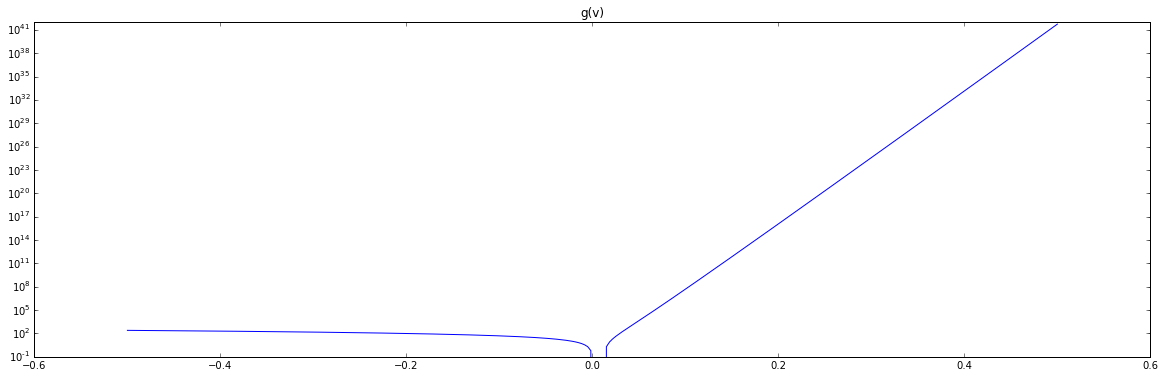

Solution for g(v) = 0 for lambda = 1, c = 500 is0.012951489125171581


In [28]:
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as plot
import math
import numpy
import scipy.optimize

def psi(v):
    return (math.exp(200*v) - math.exp(100*v))/(100*v)

def g(v, lambd, c):
    return lambd*(psi(v) - 1) - c*v

g_example = lambda x: g(x, 1, 500)

xss = numpy.linspace(-0.5, 0.5, 300)
xs = [x for x in xss]
ys = [g_example(x) for x in xs]


plot.figure(figsize=(20,6))
plot.title('g(v)')
plot.yscale('log')
plot.plot(xs, ys)
plot.show()

print("Solution for g(v) = 0 for lambda = 1, c = 500 is " + str(scipy.optimize.newton(g_example, 0.1)))

Она возрастает на $(0, +\infty)$. Её корень будем искать методом Ньютона (scipy.optimize.newton). Найдем оценку для вероятности разорения, для, скажем, начального капитала, равного 500.

In [40]:
for c in numpy.linspace(5, 50, 100):
    ans = scipy.optimize.newton(lambda x: g(x, 0.1, c), 0.1, tol = 1e-7)
    print("for c = " + str(c) + " probability of downfall is " + str(math.exp(-1000*ans)))

for c = 5.0 probability of downfall is 0.9999999991623235
for c = 5.45454545455 probability of downfall is 0.9999999972539024
for c = 5.90909090909 probability of downfall is 0.999999994700117
for c = 6.36363636364 probability of downfall is 0.9999999872147134
for c = 6.81818181818 probability of downfall is 0.9999999647614126
for c = 7.27272727273 probability of downfall is 0.9999999045145425
for c = 7.72727272727 probability of downfall is 0.9999999858693519
for c = 8.18181818182 probability of downfall is 1.0000000004768816
for c = 8.63636363636 probability of downfall is 0.999999984924515
for c = 9.09090909091 probability of downfall is 0.999999998433391
for c = 9.54545454545 probability of downfall is 0.9999999936640794
for c = 10.0 probability of downfall is 0.9999999750415784
for c = 10.4545454545 probability of downfall is 0.9999998742142743
for c = 10.9090909091 probability of downfall is 1.000000000188001
for c = 11.3636363636 probability of downfall is 0.9999999854324964
for

[1.0, 2.010204081632653, 3.0204081632653059, 4.0306122448979593, 5.0408163265306118, 6.0510204081632644, 7.0612244897959178, 8.0714285714285712, 9.0816326530612237, 10.091836734693876, 11.102040816326529, 12.112244897959183, 13.122448979591836, 14.132653061224488, 15.142857142857142, 16.153061224489797, 17.163265306122447, 18.173469387755102, 19.183673469387752, 20.193877551020407, 21.204081632653057, 22.214285714285712, 23.224489795918366, 24.234693877551017, 25.244897959183671, 26.255102040816325, 27.265306122448976, 28.27551020408163, 29.285714285714285, 30.295918367346935, 31.30612244897959, 32.316326530612244, 33.326530612244895, 34.336734693877546, 35.346938775510203, 36.357142857142854, 37.367346938775505, 38.377551020408163, 39.387755102040813, 40.397959183673464, 41.408163265306115, 42.418367346938773, 43.428571428571423, 44.438775510204074, 45.448979591836732, 46.459183673469383, 47.469387755102034, 48.479591836734691, 49.489795918367342, 50.499999999999993, 51.51020408163265

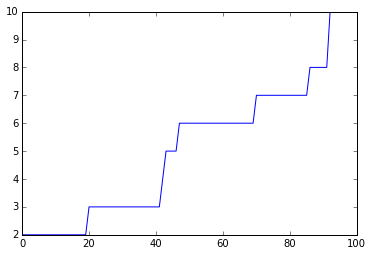

In [63]:
def poisson(lmbda, ts):
    ans = []
    count = 0
    cur_t = 0
    i = 0
    print(ts)
    while (i < len(ts)):
        if (cur_t >= ts[i]):
            ans.append(count)
            i = i + 1
        else:
            cur_t = cur_t + (scipy.stats.expon.rvs(loc = 0, scale = 1/lmbda, size = 1))[0]
            count = count + 1
    print(ans)
    return ans

def lundberg(lmbd, y_0, c, ts):
    risk_times = poisson(lmbd, ts)
    scipy.stats.uniform(100, 300, )
    for (i in range(0, len(ts))):
        no_of_risks = risk_times[i]
        

xs = [x for x in numpy.linspace(1, 100, 99)]
ys = poisson(0.1, xs)

plot.figure()
plot.plot(ys)
plot.show()